In [1]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import matplotlib

plt.style.use('ggplot')

## Test accuracy

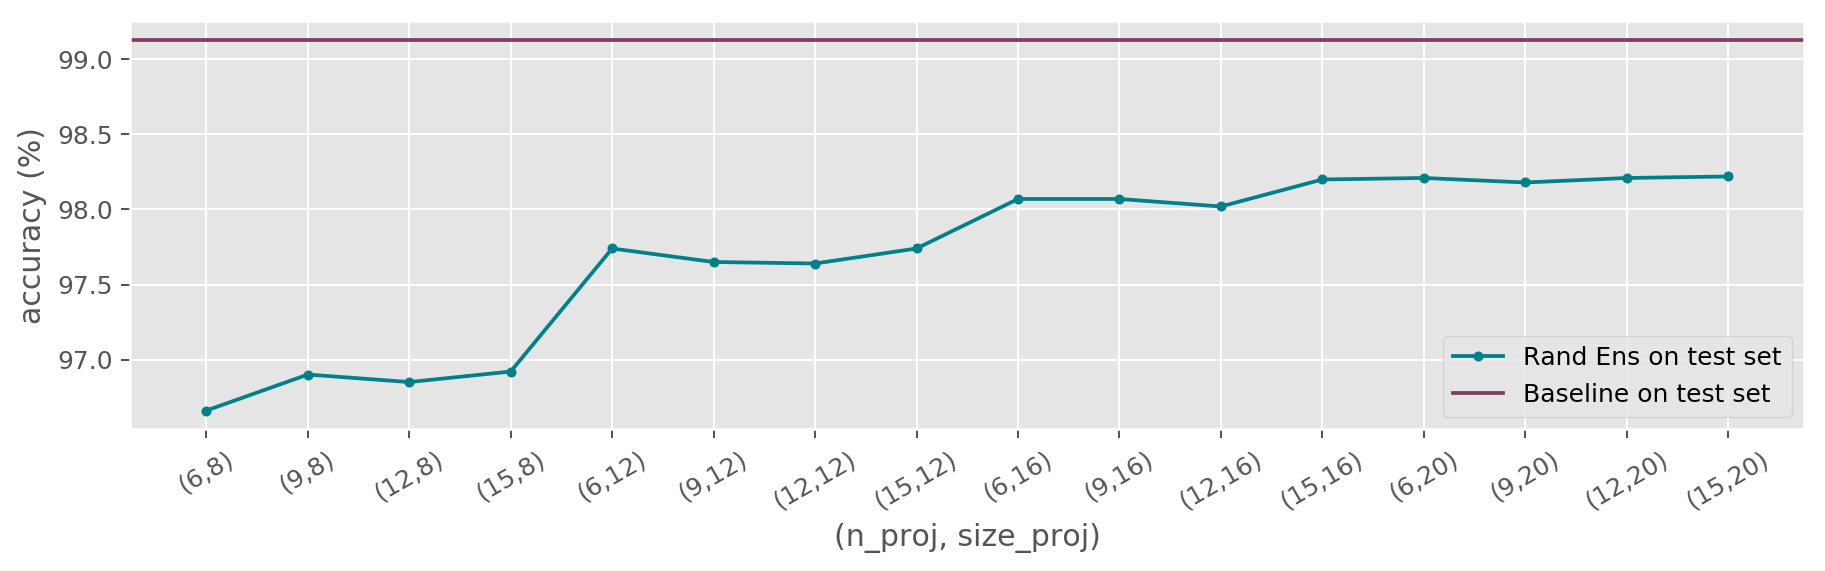

In [2]:
# random ensemble accuracy vs evaluation set
xlab = ["(6,8)","(9,8)","(12,8)","(15,8)",
        "(6,12)","(9,12)","(12,12)","(15,12)",
        "(6,16)","(9,16)","(12,16)","(15,16)",
        "(6,20)","(9,20)","(12,20)","(15,20)",]
x = range(16)
baseline_test = 99.13
random_test = [96.66,96.90,96.85,96.92,97.74,97.65,97.64,97.74,98.07,98.07,98.02,98.20,98.21,98.18,98.21,98.22]
figure(figsize=(12, 3), dpi=180, facecolor='w', edgecolor='k')

plt.plot(x,random_test,color='#00818a',label='Rand Ens on test set', marker=".")
plt.axhline(y=baseline_test,color='#843b62',label='Baseline on test set')
plt.xlabel('(n_proj, size_proj)')
plt.ylabel('accuracy (%)')
plt.xticks(x, xlab, rotation=30) 
plt.legend()

#plt.title("Random Ensemble vs Baseline model accuracy on test set")
plt.show()

## Adversarial accuracy

In [6]:
# test, fgsm, pdg, deepfool, carlini_linf
baseline = [99.13,5.91,0.71,34.83,28.96]
fgsm_robust_baseline = [99.13,98.91,32.55,96.08,95.82]
pgd_robust_baseline = [99.10,44.60,99.02,98.34,97.19]
deepfool_robust_baseline = [99.03,23.11,35.55,99.20,95.70]
carlini_robust_baseline = [99.10,14.74,3.85,94.63,99.06]

random_test = [96.60, 96.80, 96.82, 96.92, 97.57, 97.68, 97.73, 97.74, 97.98, 98.06, 98.16, 98.20, 98.16, 98.19, 98.19, 98.22]
random_fgsm = [31.44, 32.89, 32.39, 33.07, 29.09, 29.40, 30.04, 30.77, 27.98, 27.23, 27.43, 27.94, 24.40, 25.18, 25.59, 25.67]
random_deepf = [93.93, 94.47, 94.47, 94.59, 95.53, 95.78, 95.84, 95.90, 96.28, 96.38, 96.42, 96.50, 96.38, 96.51, 96.57, 96.62]
random_pgd = [64.18, 63.35, 64.53, 65.00, 60.89, 61.73, 62.25, 63.85, 59.02, 58.93, 59.79, 60.52, 57.20, 57.57, 58.18, 58.29]
random_carlini_linf = [92.72, 93.29, 93.36, 93.35, 94.29, 94.60, 94.65, 94.61, 94.85, 95.23, 95.32, 95.27, 95.44, 95.46, 95.44, 95.49]

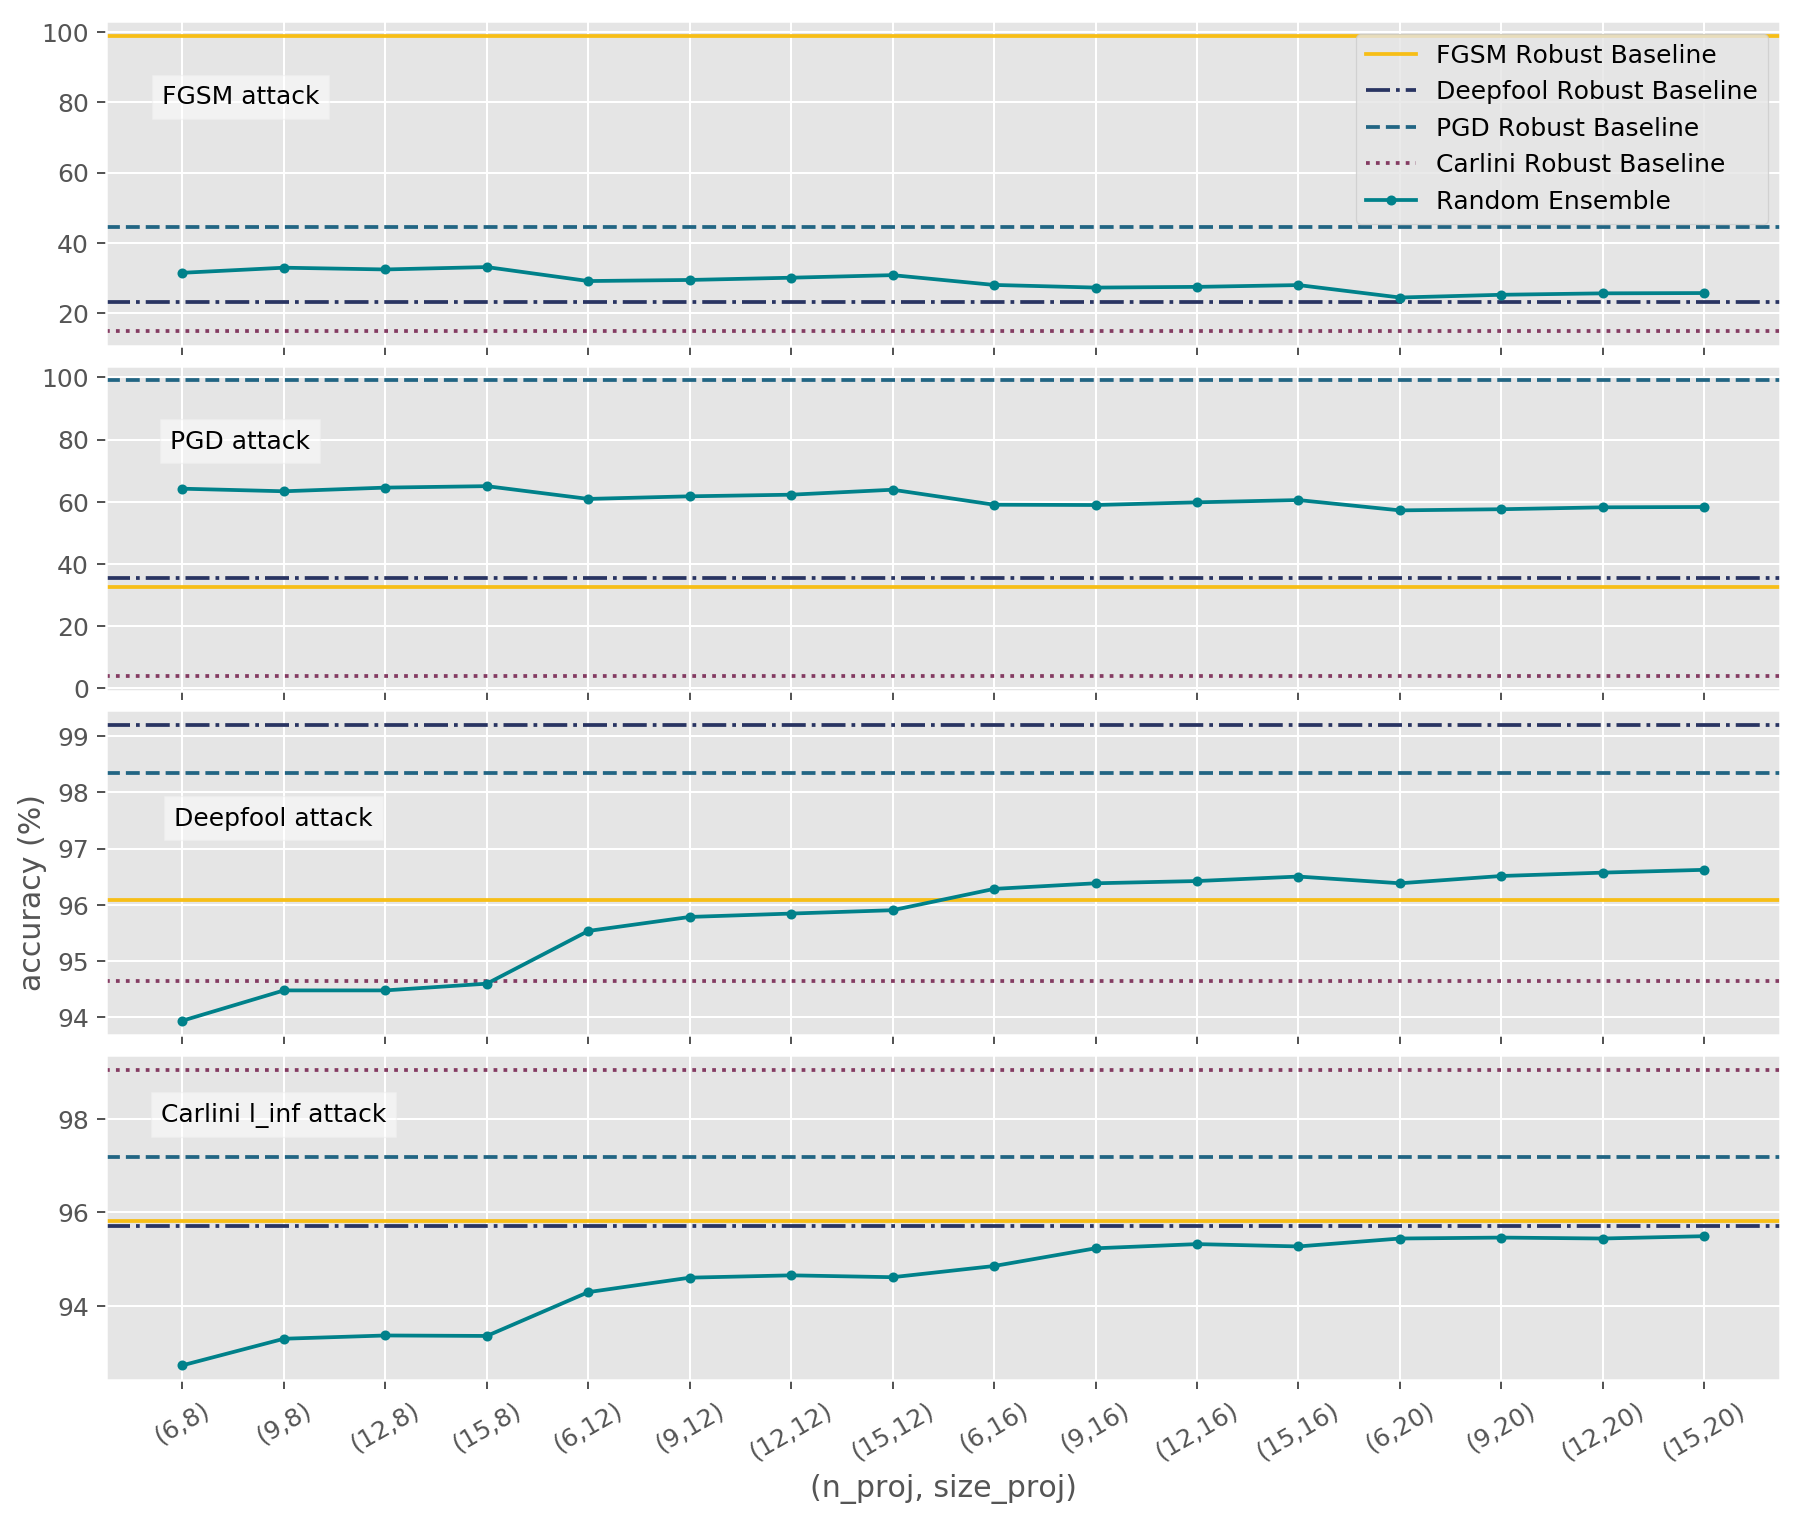

In [7]:
# random ensemble accuracy vs evaluation set

xlab = ["(6,8)","(9,8)","(12,8)","(15,8)",
        "(6,12)","(9,12)","(12,12)","(15,12)",
        "(6,16)","(9,16)","(12,16)","(15,16)",
        "(6,20)","(9,20)","(12,20)","(15,20)",]
x = range(16)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, sharex=True, figsize=(12, 10), dpi=180)
plt.ylabel('accuracy (%)', position=(0.5,1.5))
plt.xlabel('(n_proj, size_proj)')
plt.xticks(x, xlab, rotation=30) 
fig.subplots_adjust(hspace=0.06)

#ax1.axhline(y=baseline_fgsm, color="#293462", label='Baseline on FGSM', ls="dashed", linewidth=1)
ax1.axhline(y=fgsm_robust_baseline[1], color="#f7be16", label='FGSM Robust Baseline')
ax1.axhline(y=deepfool_robust_baseline[1], color="#293462", label='Deepfool Robust Baseline', ls="-.")
ax1.axhline(y=pgd_robust_baseline[1], color="#216583", label='PGD Robust Baseline', ls="--")
ax1.axhline(y=carlini_robust_baseline[1], color="#843b62", label='Carlini Robust Baseline', ls=":")
ax1.plot(x,random_fgsm,color="#00818a",label='Random Ensemble', marker=".")
ax1.legend(loc='best')
ax1.set_title("FGSM attack", fontdict={'fontsize': 10, 'fontweight': 'medium'}, x=0.08, y=0.7,
             bbox=dict(facecolor='white', alpha=0.5))


#ax2.axhline(y=baseline_pgd, color="#293462",label='Baseline on PGD',  ls="dashed", linewidth=1)
ax2.axhline(y=fgsm_robust_baseline[2], color="#f7be16",label='FGSM Robust Baseline')
ax2.axhline(y=deepfool_robust_baseline[2], color="#293462", label='Deepfool Robust Baseline', ls="-.")
ax2.axhline(y=pgd_robust_baseline[2], color="#216583", label='PGD Robust Baseline', ls="--")
ax2.axhline(y=carlini_robust_baseline[2], color="#843b62", label='Carlini Robust Baseline', ls=":")
ax2.plot(x,random_pgd,color="#00818a",label='Random Ensemble', marker=".")
#ax2.legend(loc='best', title="PGD attack")#,bbox_to_anchor=(0.65, 0.5, 0.5, 0.5))
ax2.set_title("PGD attack", fontdict={'fontsize': 10, 'fontweight': 'medium'}, x=0.08, y=0.7,
             bbox=dict(facecolor='white', alpha=0.5))

#ax3.axhline(y=baseline_deepf, color="#293462",label='Baseline on DeepFool',  ls="dashed", linewidth=1)
ax3.axhline(y=fgsm_robust_baseline[3], color="#f7be16",label='FGSM Robust Baseline')
ax3.axhline(y=deepfool_robust_baseline[3], color="#293462", label='Deepfool Robust Baseline', ls="-.")
ax3.axhline(y=pgd_robust_baseline[3], color="#216583", label='PGD Robust Baseline', ls="--")
ax3.axhline(y=carlini_robust_baseline[3], color="#843b62", label='Carlini Robust Baseline', ls=":")
ax3.plot(x,random_deepf,color="#00818a",label='Random Ensemble', marker=".")
#ax3.legend(loc='best', title="Deepfool attack")#,bbox_to_anchor=(0.65, 0.5, 0.5, 0.5))
ax3.set_title("Deepfool attack", fontdict={'fontsize': 10, 'fontweight': 'medium'}, x=0.1, y=0.6,
             bbox=dict(facecolor='white', alpha=0.5))

#ax4.axhline(y=baseline_carlini_linf, color="#293462",label='Baseline on Carlini',  ls="dashed", linewidth=1)
ax4.axhline(y=fgsm_robust_baseline[4], color="#f7be16",label='FGSM Robust Baseline')
ax4.axhline(y=deepfool_robust_baseline[4], color="#293462", label='Deepfool Robust Baseline', ls="-.")
ax4.axhline(y=pgd_robust_baseline[4], color="#216583", label='PGD Robust Baseline', ls="--")
ax4.axhline(y=carlini_robust_baseline[4], color="#843b62", label='Carlini Robust Baseline', ls=":")
ax4.plot(x,random_carlini_linf,color="#00818a",label='Random Ensemble', marker=".")
#ax4.legend(loc='best', title="Carlini l_inf attack")#,bbox_to_anchor=(0.65, 0., 0.5, 0.5))
ax4.set_title("Carlini l_inf attack", fontdict={'fontsize': 10, 'fontweight': 'medium'}, x=0.1, y=0.75,
             bbox=dict(facecolor='white', alpha=0.5))

fig.show()

In [ ]:
# data
baseline_fgsm = 24.17
baseline_deepf = 56.80
baseline_pgd = 12.58
random_test = [96.66,96.90,96.85,96.92,97.74,97.65,97.64,97.74,98.07,98.07,98.02,98.20,98.21,98.18,98.21,98.22]
random_fgsm = [55.39,58.80,56.95,58.61,60.65,57.79,61.22,60.72,59.67,60.44,61.74,62.01,59.17,59.29,59.90,61.22]
random_deepf = [95.99,96.29,96.20,96.42,97.05,97.12,97.22,97.19,97.62,97.71,97.82,97.69,97.83,97.80,97.91,97.88]
random_pgd = [77.84,79.18,79.61,80.75,80.46,80.20,82.69,82.94,78.55,79.30,79.45,79.55,79.22,78.83,79.64,79.98]

# xticks
x = range(16)
xlab = ["(6,8)","(9,8)","(12,8)","(15,8)",
        "(6,12)","(9,12)","(12,12)","(15,12)",
        "(6,16)","(9,16)","(12,16)","(15,16)",
        "(6,20)","(9,20)","(12,20)","(15,20)",]

# plots
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharex=False,  figsize=(12, 3), dpi=180)
#fig.suptitle("Random Ensemble vs Baseline accuracy on the adversaries", size=14)

ax1.set_title("FGSM attacks", size=12)
ax1.plot(x,random_fgsm,color="r",label='Rand Ens')
ax1.axhline(y=baseline_fgsm, color="darkred", label='Baseline')
ax1.legend(loc='best',bbox_to_anchor=(0.5, 0., 0.5, 0.5))
ax1.set_xticks(x, xlab) 
ax1.set_xticklabels(xlab, rotation=45)

ax2.set_title("DeepFool attacks", size=12)
ax2.plot(x,random_deepf,color="dodgerblue",label='Rand Ens')
ax2.axhline(y=baseline_deepf, color="darkblue",label='Baseline')
ax2.legend(loc='best',bbox_to_anchor=(0.5, 0., 0.5, 0.5))
ax2.set_xticks(x, xlab) 
ax2.set_xticklabels(xlab, rotation=45)

ax3.set_title("PGD attacks", size=12)
ax3.plot(x,random_pgd,color="limegreen",label='Rand Ens')
ax3.axhline(y=baseline_pgd, color="darkgreen",label='Baseline')
ax3.legend(loc='best',bbox_to_anchor=(0.5, 0., 0.5, 0.5))
ax3.set_xticks(x, xlab) 
ax3.set_xticklabels(xlab, rotation=45)

plt.ylabel('accuracy (%)', position=(0.5,0.5))
plt.xlabel('(n_proj, size_proj)', position=(0.5,0))
fig.show()

## Complexity

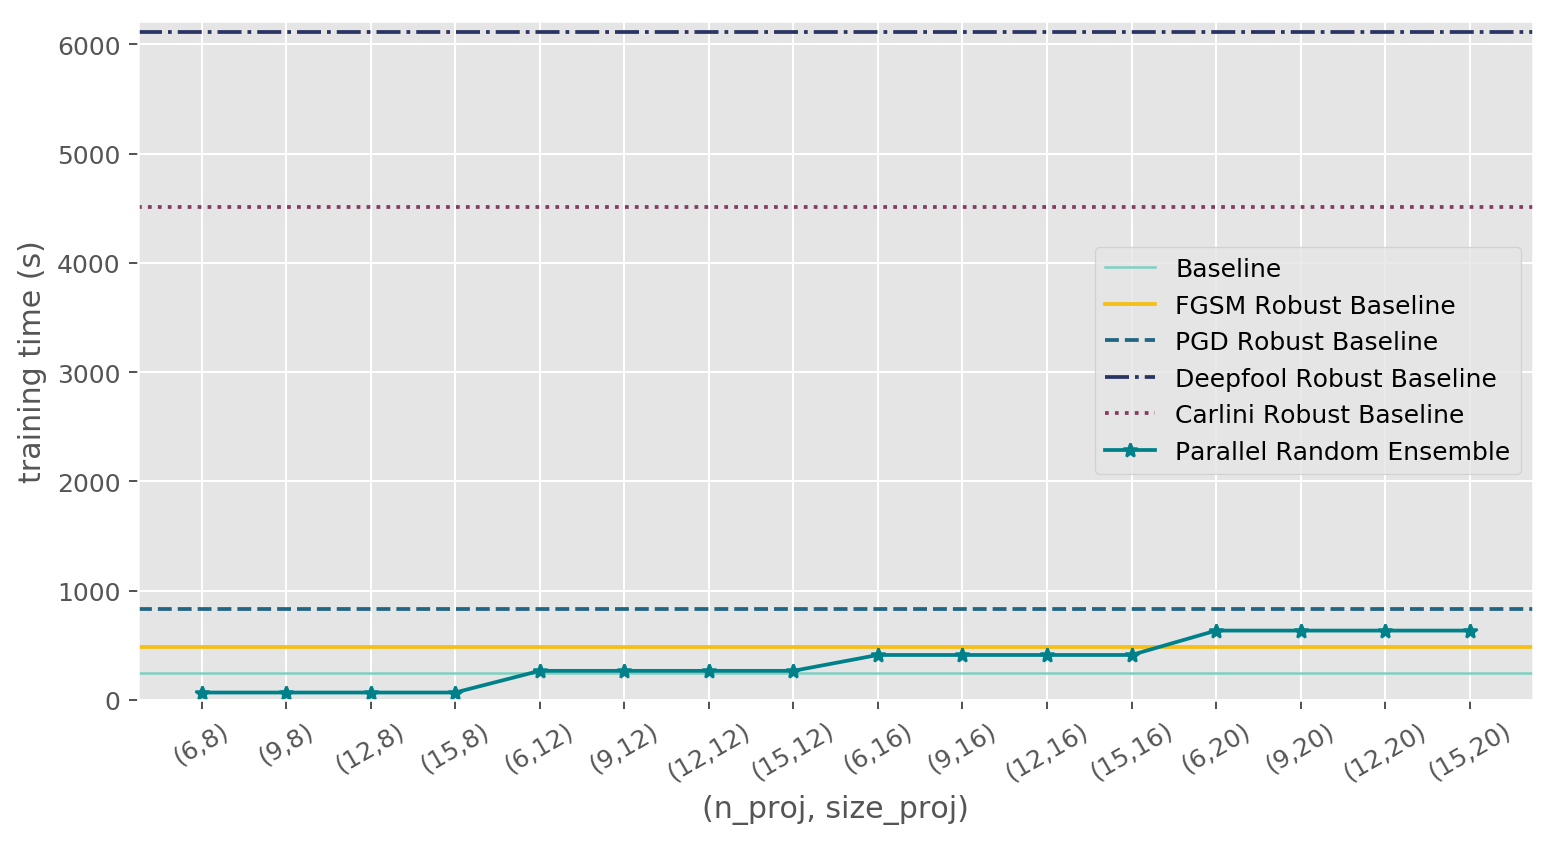

In [28]:
# random ensemble accuracy vs evaluation set

xlab = ["(6,8)","(9,8)","(12,8)","(15,8)",
        "(6,12)","(9,12)","(12,12)","(15,12)",
        "(6,16)","(9,16)","(12,16)","(15,16)",
        "(6,20)","(9,20)","(12,20)","(15,20)",]

x = range(16)

# plain, fgsm, pgd, deepfool, carlini_linf
baseline = [244.64,486.45,833.16,6116.33,4507.31]

randens_times_old = [161.56358885765076, 244.69218850135803, 330.3099126815796, 449.8663718700409,
                 306.13498520851135, 462.9905071258545, 614.2709856033325, 754.4713060855865,
                 481.06000685691833, 730.0027039051056, 969.5257754325867, 1202.7333579063416,
                 713.6330585479736, 1042.581505537033, 1423.9588317871094, 1784.10049700737]

randens_times = [1045.2583463191986,
2555.6296741962433, 
3144.4848911762238, 
1316.7294340133667, 
2173.0551035404205, 
6833.772572278976,  
8294.763188838959,  
12240.271400928497, 
3718.577780723572,  
14803.005425453186, 
27848.05566883087,  
23362.26087665558,  
5714.933403015137,  
17924.82506251335,  
26164.82797217369,  
26257.255435466766 ]

par_randens_times = [
69.18349480628967,69.18349480628967,69.18349480628967,69.18349480628967,
267.5957431793213,267.5957431793213,267.5957431793213,267.5957431793213, 
412.77997064590454,412.77997064590454,412.77997064590454,412.77997064590454, 
635.8284521102905,635.8284521102905,635.8284521102905,635.8284521102905
]

figure(num=None, figsize=(10, 5), dpi=180, facecolor='w', edgecolor='k')
plt.axhline(y=baseline[0], color='#7ecfc0', label='Baseline', linewidth=1)
plt.axhline(y=baseline[1], color="#f7be16", label='FGSM Robust Baseline', ls="-")
plt.axhline(y=baseline[2], color="#216583", label='PGD Robust Baseline', ls="--")
plt.axhline(y=baseline[3], color="#293462", label='Deepfool Robust Baseline', ls="-.")
plt.axhline(y=baseline[4], color="#843b62", label='Carlini Robust Baseline', ls=":")

#plt.plot(x,randens_times,color='#00818a',label='Serial Random Ensemble', marker=".")
#plt.plot(x,par_randens_times,color='#293462',label='Parallel Random Ensemble', marker="*")
plt.plot(x,par_randens_times,color='#00818a',label='Parallel Random Ensemble', marker="*")
#plt.yscale("log")



plt.xlabel('(n_proj, size_proj)')
plt.ylabel('training time (s)')
plt.xticks(x, xlab, rotation=30) 
plt.ylim([0, baseline[3]+100])
plt.legend(loc='center right')
#plt.title("Random Ensemble vs Baseline training time")
plt.show()

## loss

In [38]:
import sys
sys.path.append("../src/")
import utils
from baseline_convnet import BaselineConvnet
from keras.models import load_model
from art.classifiers import TFClassifier
from utils import *

# load models
x_train, y_train, x_test, y_test, input_shape, num_classes = preprocess_mnist()

model = BaselineConvnet(input_shape=input_shape, num_classes=num_classes)

#baseline_classifier = model.load_classifier(relative_path="../trained_models/IBM-art/mnist_cnn_robust.h5")

baseline = model.load_classifier("../trained_models/baseline/baseline.h5")


Loading mnist.
x_train shape: (60000, 28, 28, 1) 
x_test shape: (10000, 28, 28, 1)

Loading the model.


In [59]:
baseline.loss_gradient

<bound method KerasClassifier.loss_gradient of art.classifiers.keras.KerasClassifier(clip_values=(0, 255), model=<keras.engine.training.Model object at 0x7fae6e2cb518>, use_logits=False, channel_index=3, defences=None, preprocessing=(0, 1), input_layer=0, output_layer=0, custom_activation=False)>

In [58]:
# Visualize training history
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy

# summarize history for loss
plt.plot(loss)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

KeyboardInterrupt: 

In [ ]:
# list all data in history
print(baseline_classifier.history.keys())
# summarize history for accuracy
plt.plot(baseline_classifier.history['acc'])
plt.plot(baseline_classifier.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

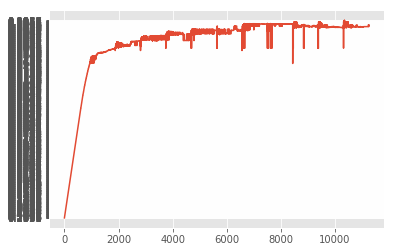

In [2]:
with open('../trained_models/baseline/log_files/pgd_advtraining_plot.txt') as f:
    lines = f.readlines()
    loss = [line.split()[0] for line in lines]
    acc = [line.split()[1] for line in lines]
plt.plot(acc)
plt.show()